# Lab-1

> 8/8/2023 Lab 1 <br>
> Mrinal Bhan, DSAI 211020428

### Tasks
Experiment Number - 01: Write a program to perform the following operations:
- Grayscaling Images
    - Input: 1. Grayscaling (Black and White) image and convert it into Color image  Output: Color Images 
    - Input: 2. Color the image and convert it into Grayscaling  Output:   Grayscaling Images
- Image Smoothing: Remove the noise and increase  the quality of Images
- Edge Detection: Edge detection helps segment images to allow for data extraction
- Skew Correction: Eliminate the skew
- Image Compression:
    - Input :1. Display Size of images and perform Lossless image compression. Output: Compress Images
    - Input:2. Decompress  output: return original image

### Grayscaling Images

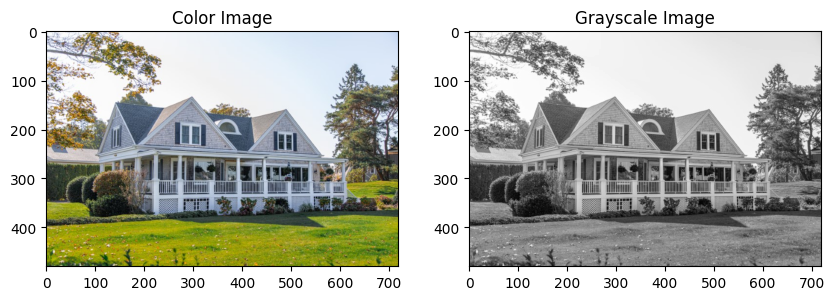

In [12]:
# Input: Color image
# Output: Grayscale image
# Description: This program converts a color image to grayscale image

# Importing the libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Reading the image
img = cv2.imread('house.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Converting the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Displaying the image
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Color Image')
plt.imshow(img_rgb)
plt.subplot(1, 2, 2)
plt.title('Grayscale Image')
plt.imshow(gray, cmap='gray')
plt.show()

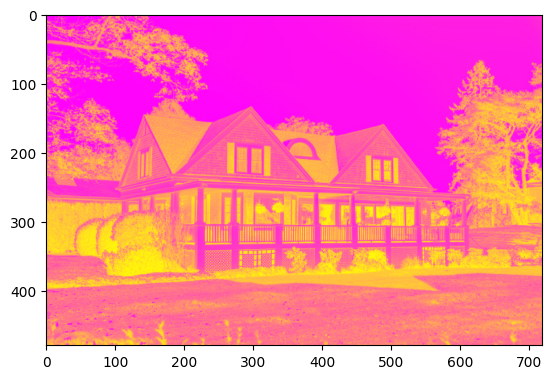

In [13]:
# Converting grayscale to color
cimg = cv2.applyColorMap(gray, colormap=cv2.COLORMAP_COOL)

plt.imshow(cimg)
plt.show()


### Image Smoothing

**Using Median Filter**:
The Median Filter takes all the pixels under a kernel area and replaces the center element with the median value. It is meant to be highly effective against Impulse noise.

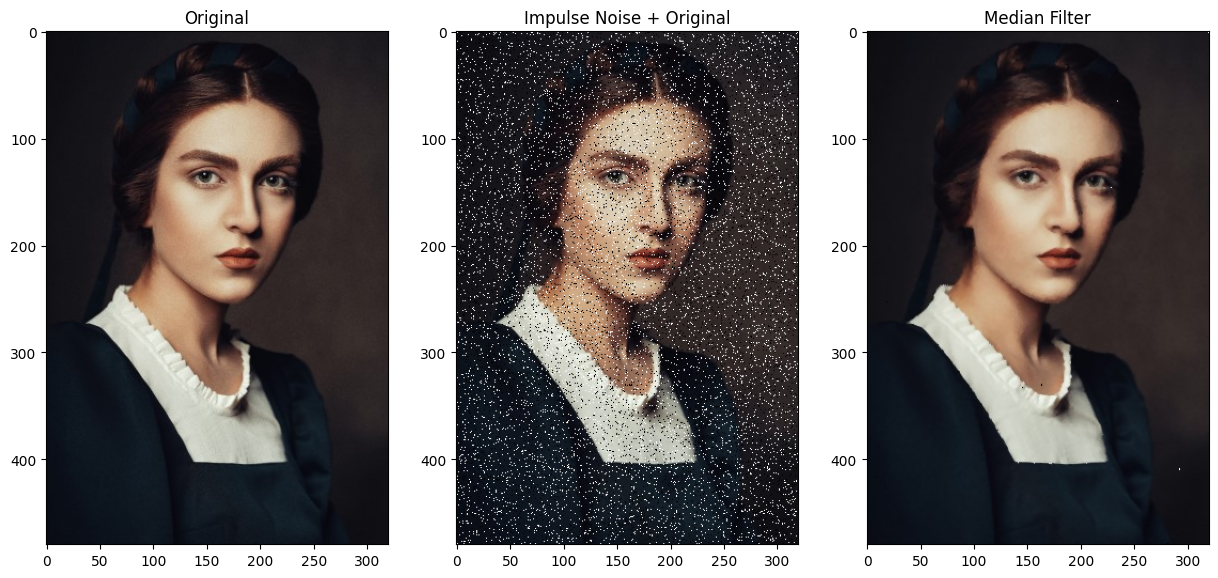

In [14]:
# Read image
img = cv2.imread('portrait.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Impulse noise
in_img = img_rgb.copy()
p = 0.1
for i in range(in_img.shape[0]):
    for j in range(in_img.shape[1]):
        r = np.random.rand()
        if r < p / 2:
            in_img[i, j] = [0, 0, 0]
        elif r < p:
            in_img[i, j] = [255, 255, 255]

# Apply median filter to remove noise
img_median = cv2.medianBlur(in_img, 3)

# Plot images
plt.figure(figsize=(15, 15))
plt.subplot(131), plt.imshow(img_rgb), plt.title('Original')
plt.subplot(132), plt.imshow(in_img), plt.title('Impulse Noise + Original')
plt.subplot(133), plt.imshow(img_median), plt.title('Median Filter')
plt.show()

### Edge Detection

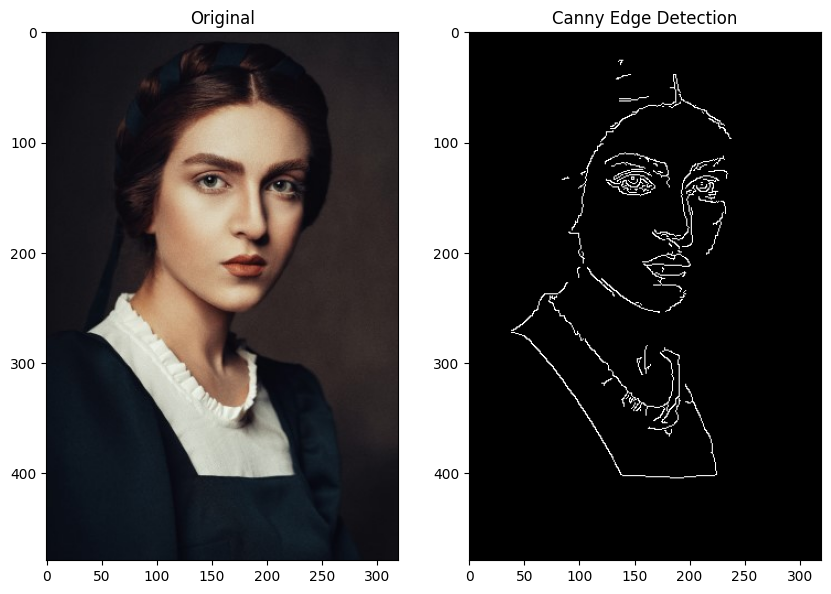

In [15]:
# Edge Detection

import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the original image
img = cv2.imread('portrait.jpg') 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Canny edge detection
edges = cv2.Canny(img_gray, 100, 200)

# Plot the images
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(img_rgb), plt.title('Original')
plt.subplot(122),plt.imshow(edges, cmap='gray'), plt.title('Canny Edge Detection')
plt.show()

### Skew Correction

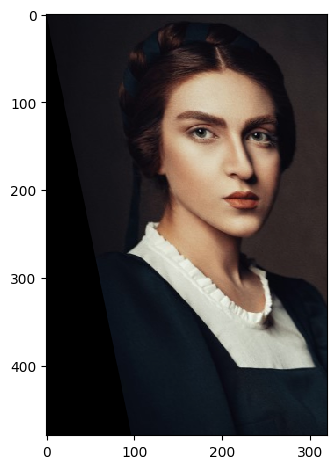

In [16]:
from skimage import io
from skimage import transform as tf

# Load the image as a matrix
image = io.imread("portrait.jpg")

# Create Afine transform
afine_tf = tf.AffineTransform(shear=0.2)

# Apply transform to image data
modified = tf.warp(image, inverse_map=afine_tf)

# Display the result
io.imshow(modified)
io.show()

### Image Compression and Decompression

**JPEG Compression with PIL/Pillow:**
The JPEG format supports lossy compression and is widely used for image compression. The PIL (Python Imaging Library) or its fork Pillow provides easy-to-use functions for JPEG compression.

In [17]:
# Image Compression
from PIL import Image
import os

# Open an image
image = Image.open('portrait.jpg')

# Save the image with PNG compression
image.save('compressed_image.jpg', compress_level=9)  # Adjust compress_level (0-9)

original_size = os.path.getsize('portrait.jpg')
compressed_size = os.path.getsize('compressed_image.jpg')

print("Original Size: ", original_size)
print("Compressed Size: ", compressed_size)

Original Size:  26514
Compressed Size:  12370


**Decompressing JPG Images**

In [19]:
# Open a compressed JPEG image
compressed_image = Image.open('starbucks.jpg')

# Save the decompressed image
compressed_image.save('decompressed_image.jpg')

original_size = os.path.getsize('starbucks.jpg')
decompressed_size = os.path.getsize('decompressed_image.jpg')

print("Original Size: ", original_size)
print("decompressed Size: ", decompressed_size)

Original Size:  78265
decompressed Size:  80602
